In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading the csv file

train_df = pd.read_csv("/Users/atharvasakpal/Desktop/deeplearning/signLanguage/archive/sign_mnist_train.csv")
test_df = pd.read_csv("/Users/atharvasakpal/Desktop/deeplearning/signLanguage/archive/sign_mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']

In [5]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [6]:
x_train = train_df.values
x_test = test_df.values
x_train[1].shape

(784,)

In [7]:
x_train[1] ##pixel values of train ex 1

array([155, 157, 156, 156, 156, 157, 156, 158, 158, 157, 158, 156, 154,
       154, 153, 152, 151, 149, 149, 148, 147, 146, 144, 142, 143, 138,
        92, 108, 158, 159, 159, 159, 160, 160, 160, 160, 160, 160, 160,
       159, 158, 157, 155, 154, 153, 152, 151, 150, 149, 149, 147, 147,
       146, 142, 116, 143, 161, 161, 161, 161, 162, 161, 162, 162, 162,
       162, 161, 161, 161, 160, 159, 158, 156, 155, 154, 153, 152, 152,
       151, 150, 147, 147, 125, 140, 165, 164, 164, 165, 165, 165, 165,
       165, 164, 164, 164, 165, 163, 163, 162, 161, 159, 159, 158, 156,
       156, 155, 152, 153, 154, 151, 124, 126, 166, 167, 166, 167, 167,
       166, 167, 167, 167, 167, 166, 167, 165, 165, 164, 163, 162, 162,
       161, 160, 156, 151, 154, 176, 145, 122, 144, 100, 168, 169, 168,
       169, 169, 168, 169, 170, 170, 170, 169, 168, 167, 166, 167, 165,
       162, 159, 159, 156, 151, 165, 171, 146,  94, 130, 159, 111, 171,
       171, 170, 171, 171, 171, 172, 171, 171, 171, 172, 169, 16

In [8]:
import tensorflow as tf
from tensorflow import keras


#one hot encoding of the output values
#y_train = tf.one_hot(y_train,24)
#y_test = tf.one_hot(y_test,24)

''' LabelBinarizer doesnt work well with multi column data so it is used mostly for the y part and one hot encoding is used for the x part '''


from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [9]:
y_train[0].shape

(24,)

In [10]:
#normalizing the data

x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0] #1D array


array([0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
       0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471,
       0.61960784, 0.62745098, 0.63921569, 0.64705882, 0.62352941,
       0.65098039, 0.65882353, 0.66666667, 0.66666667, 0.67058824,
       0.67058824, 0.67058824, 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.66666667, 0.6627451 , 0.43529412, 0.4745098 ,
       0.50588235, 0.52941176, 0.55294118, 0.56470588, 0.58039216,
       0.59215686, 0.60392157, 0.61568627, 0.62745098, 0.63921569,
       0.64313725, 0.66666667, 0.46666667, 0.59607843, 0.67058824,
       0.67058824, 0.66666667, 0.67058824, 0.6745098 , 0.6745098 ,
       0.6745098 , 0.6745098 , 0.6745098 , 0.67058824, 0.67058824,
       0.66666667, 0.44313725, 0.48235294, 0.51372549, 0.5372549 ,
       0.55686275, 0.56862745, 0.58823529, 0.59607843, 0.60784314,
       0.61960784, 0.63137255, 0.63921569, 0.64313725, 0.6745098 ,
       0.41176471, 0.55686275, 0.66666667, 0.67058824, 0.67058

In [12]:
x_train.shape #(27455 examples of 1D array of 785 values)

(27455, 784)

In [13]:
#converting 1D array to 3D array to feed into cnn

x_train= x_train.reshape(x_train.shape[0],28,28) #(28,28,1) --> greyscale image
x_test= x_test.reshape(x_test.shape[0],28,28)

In [14]:
x_test.shape


(7172, 28, 28)

In [15]:
x_train[0]

array([[0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
        0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471,
        0.61960784, 0.62745098, 0.63921569, 0.64705882, 0.62352941,
        0.65098039, 0.65882353, 0.66666667, 0.66666667, 0.67058824,
        0.67058824, 0.67058824, 0.6745098 , 0.67058824, 0.67058824,
        0.66666667, 0.66666667, 0.6627451 ],
       [0.43529412, 0.4745098 , 0.50588235, 0.52941176, 0.55294118,
        0.56470588, 0.58039216, 0.59215686, 0.60392157, 0.61568627,
        0.62745098, 0.63921569, 0.64313725, 0.66666667, 0.46666667,
        0.59607843, 0.67058824, 0.67058824, 0.66666667, 0.67058824,
        0.6745098 , 0.6745098 , 0.6745098 , 0.6745098 , 0.6745098 ,
        0.67058824, 0.67058824, 0.66666667],
       [0.44313725, 0.48235294, 0.51372549, 0.5372549 , 0.55686275,
        0.56862745, 0.58823529, 0.59607843, 0.60784314, 0.61960784,
        0.63137255, 0.63921569, 0.64313725, 0.6745098 , 0.41176471,
        0.55686275, 0.6666

### Previewing the images

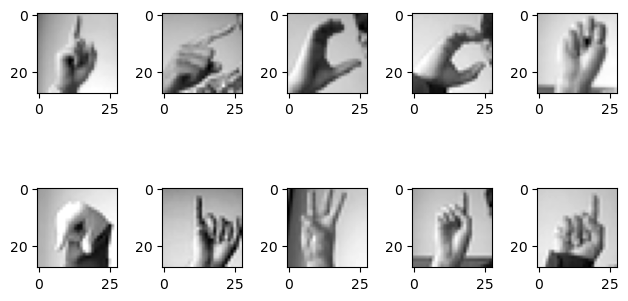

In [16]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(2,5)
k=0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28,28),cmap='gray')
        k+=1
    plt.tight_layout()

In [17]:
## Data augmentation (optional)

### Implementing CNN

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [19]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

2023-11-14 00:59:26.455598: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-14 00:59:26.455640: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-14 00:59:26.455649: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-14 00:59:26.455676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-14 00:59:26.455691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [21]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history= model.fit(x_train,y_train,epochs=20, validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/20


2023-11-14 00:59:27.081318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 19s 21ms/step - loss: 0.4275 - accuracy: 0.8744 - val_loss: 0.4721 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 2/20
858/858 [==============================] - 18s 21ms/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.8060 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 3/20
858/858 [==============================] - 18s 21ms/step - loss: 0.0758 - accuracy: 0.9812 - val_loss: 0.2699 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 4/20
858/858 [==============================] - 18s 21ms/step - loss: 0.0513 - accuracy: 0.9895 - val_loss: 0.4120 - val_accuracy: 0.9340 - lr: 0.0010
Epoch 5/20
858/858 [==============================] - 18s 21ms/step - loss: 0.0546 - accuracy: 0.9898 - val_loss: 0.8619 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 6/20
857/858 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9926
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
858/858 [==============================] - 18s 21ms/st

In [23]:
print("Accuracy of the model is: ",model.evaluate(x_test,y_test)[1]*100, "%")

225/225 [==============================] - 2s 8ms/step - loss: 0.2852 - accuracy: 0.9688
Accuracy of the model is:  96.87674045562744 %


### Analysis after Model Training

Text(0.5, 1.0, 'Training & Val accuracy')

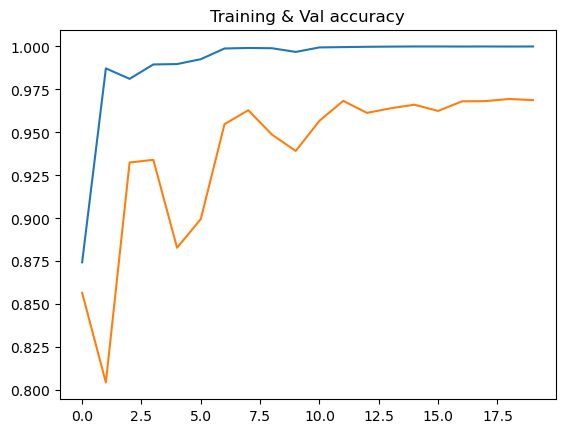

In [24]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training & Val accuracy')

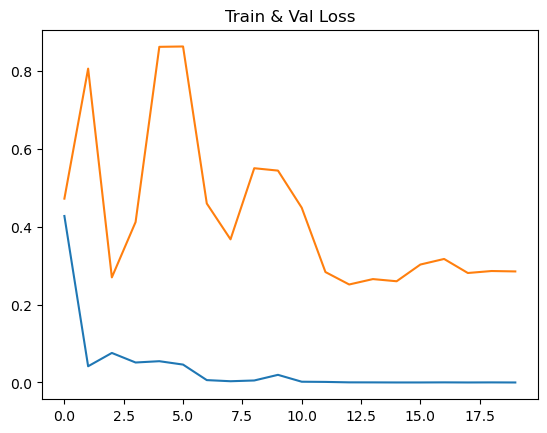

In [25]:
plt.title("Train & Val Loss")
plt.plot(train_loss)
plt.plot(val_loss)

In [26]:
## Predictions

In [29]:
predictions = model.predict(x_test)
predictions

225/225 [==============================] - 1s 6ms/step


array([[0.0000000e+00, 1.7169010e-35, 2.2635650e-21, ..., 0.0000000e+00,
        6.9405757e-24, 8.1964135e-34],
       [6.5082789e-27, 3.7931851e-15, 0.0000000e+00, ..., 9.6128247e-18,
        5.3059856e-28, 6.6687223e-34],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.3490145e-36, 0.0000000e+00],
       [0.0000000e+00, 1.7029478e-36, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [38]:
predictions.shape

(7172, 24)

In [42]:

predictions[0]+1

array([1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.], dtype=float32)

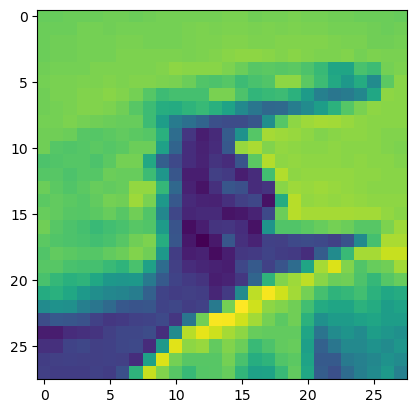

In [43]:
plt.imshow(x_test[0])